<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #3498db; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Importing Modules and Libraries</p>
</div>


In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_california_housing

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #3498db; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Reading Dataset</p>
</div>


In [3]:
data=fetch_california_housing()

In [4]:
x=pd.DataFrame(data['data'],columns=data['feature_names'])
y=pd.Series(data['target'])

In [5]:
y.name='Price'

In [6]:

xtra,xtest,ytra,ytest=train_test_split(x,y,test_size=0.2,random_state=90)

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #3498db; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Test For multicollinearity</p>
</div>
 

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
values=[variance_inflation_factor(xtra.values,i) for i in range(xtra.shape[1])]

In [9]:
pd.DataFrame(dict(values=values),index=xtra.columns)

,values
MedInc,11.563076
HouseAge,7.233317
AveRooms,47.020816
AveBedrms,41.681426
Population,2.938734
AveOccup,1.080936
Latitude,560.971462
Longitude,630.317901


<Axes: >

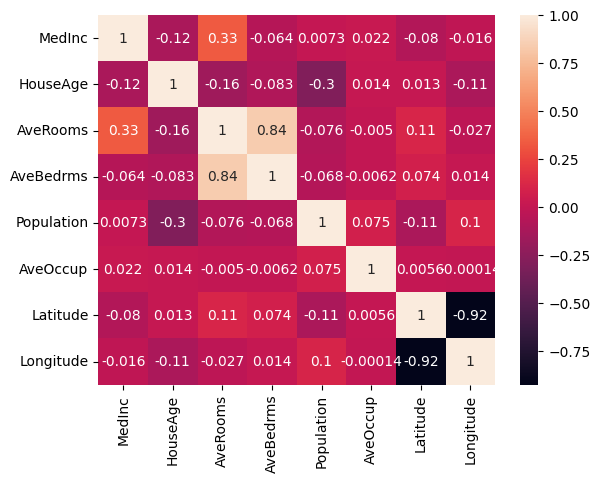

In [10]:
sb.heatmap(data=xtra.corr(),annot=True)

<div style="border-radius: 10px; border: rgb(229, 124, 35) solid; padding: 15px; background-color: rgb(255, 250, 240); font-size: 100%; text-align: left; box-shadow: 0 0 15px rgba(229, 124, 35, 0.7);">
    <ul style="margin: 0; padding-left: 20px; list-style-type: square;">
        <li><strong>Important features are collinear with other so we can't remove it by our domain knowledge</strong></li>
    </ul>
</div>

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #3498db; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);"> Testing the Significance of Features</p>
</div>



In [11]:
from sklearn.feature_selection import f_regression

In [12]:
pval=f_regression(xtra,ytra)[1]

In [13]:
np.where(pval<0.05)

(array([0, 1, 2, 3, 4, 5, 6, 7]),)

<div style="border-radius: 10px; border: rgb(229, 124, 35) solid; padding: 15px; background-color: rgb(255, 250, 240); font-size: 100%; text-align: left; box-shadow: 0 0 15px rgba(229, 124, 35, 0.7);">
    <ul style="margin: 0; padding-left: 20px; list-style-type: square;">
        <li><strong>It shows all values are statistically significant</strong></li>
    </ul>
</div>



<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #3498db; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Linearity and Homoscadascity Scatterplots</p>
</div>


<Figure size 2000x2000 with 0 Axes>

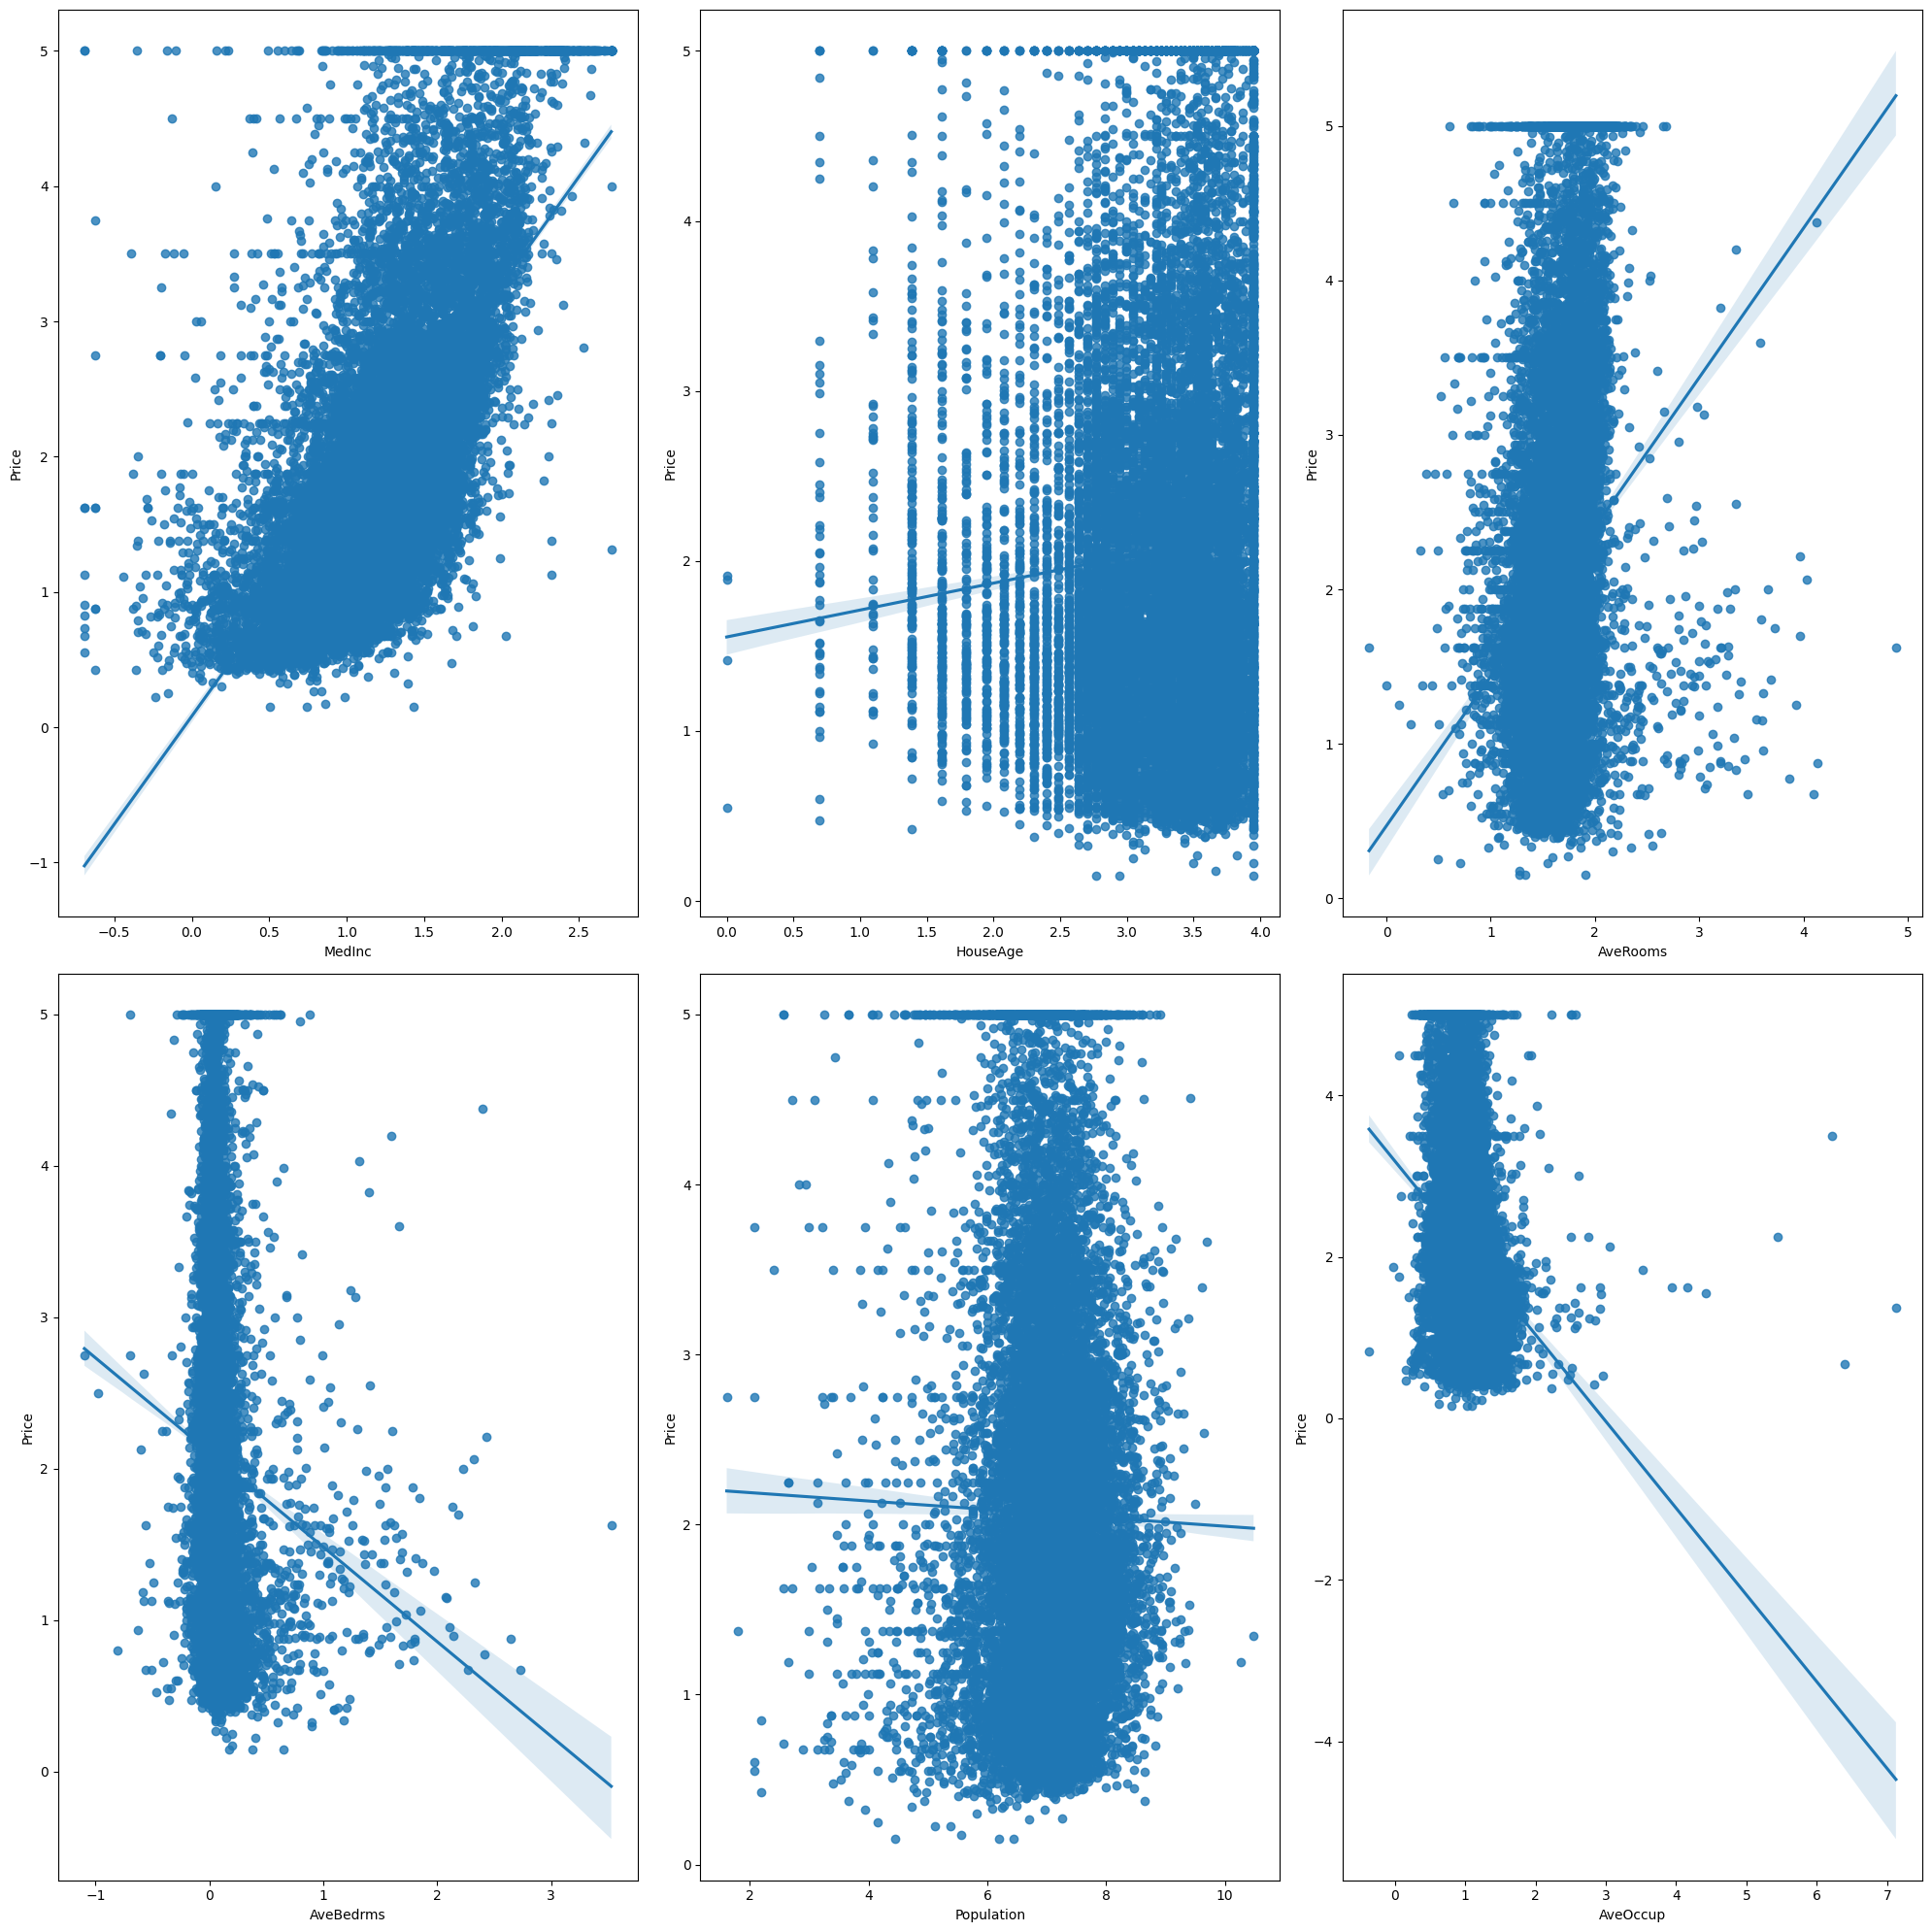

In [14]:
fig=plt.figure(figsize=(20,20))
fig,axes=plt.subplots(2,3,figsize=(20,20))
axes=axes.flatten()
newcol=xtra.columns[:-2]
for i in range(len(newcol)):
    
    sb.regplot(y=ytra,x=np.log(xtra[newcol[i]]),ax=axes[i])
plt.tight_layout()

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #3498db; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Standardizing the data</p>
</div>



In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [16]:
ss=StandardScaler()
scaler=('ss',ss,newcol)
col=ColumnTransformer([scaler],remainder='passthrough')
newdata=pd.DataFrame(col.fit_transform(xtra),columns=xtra.columns)

<Figure size 2000x2000 with 0 Axes>

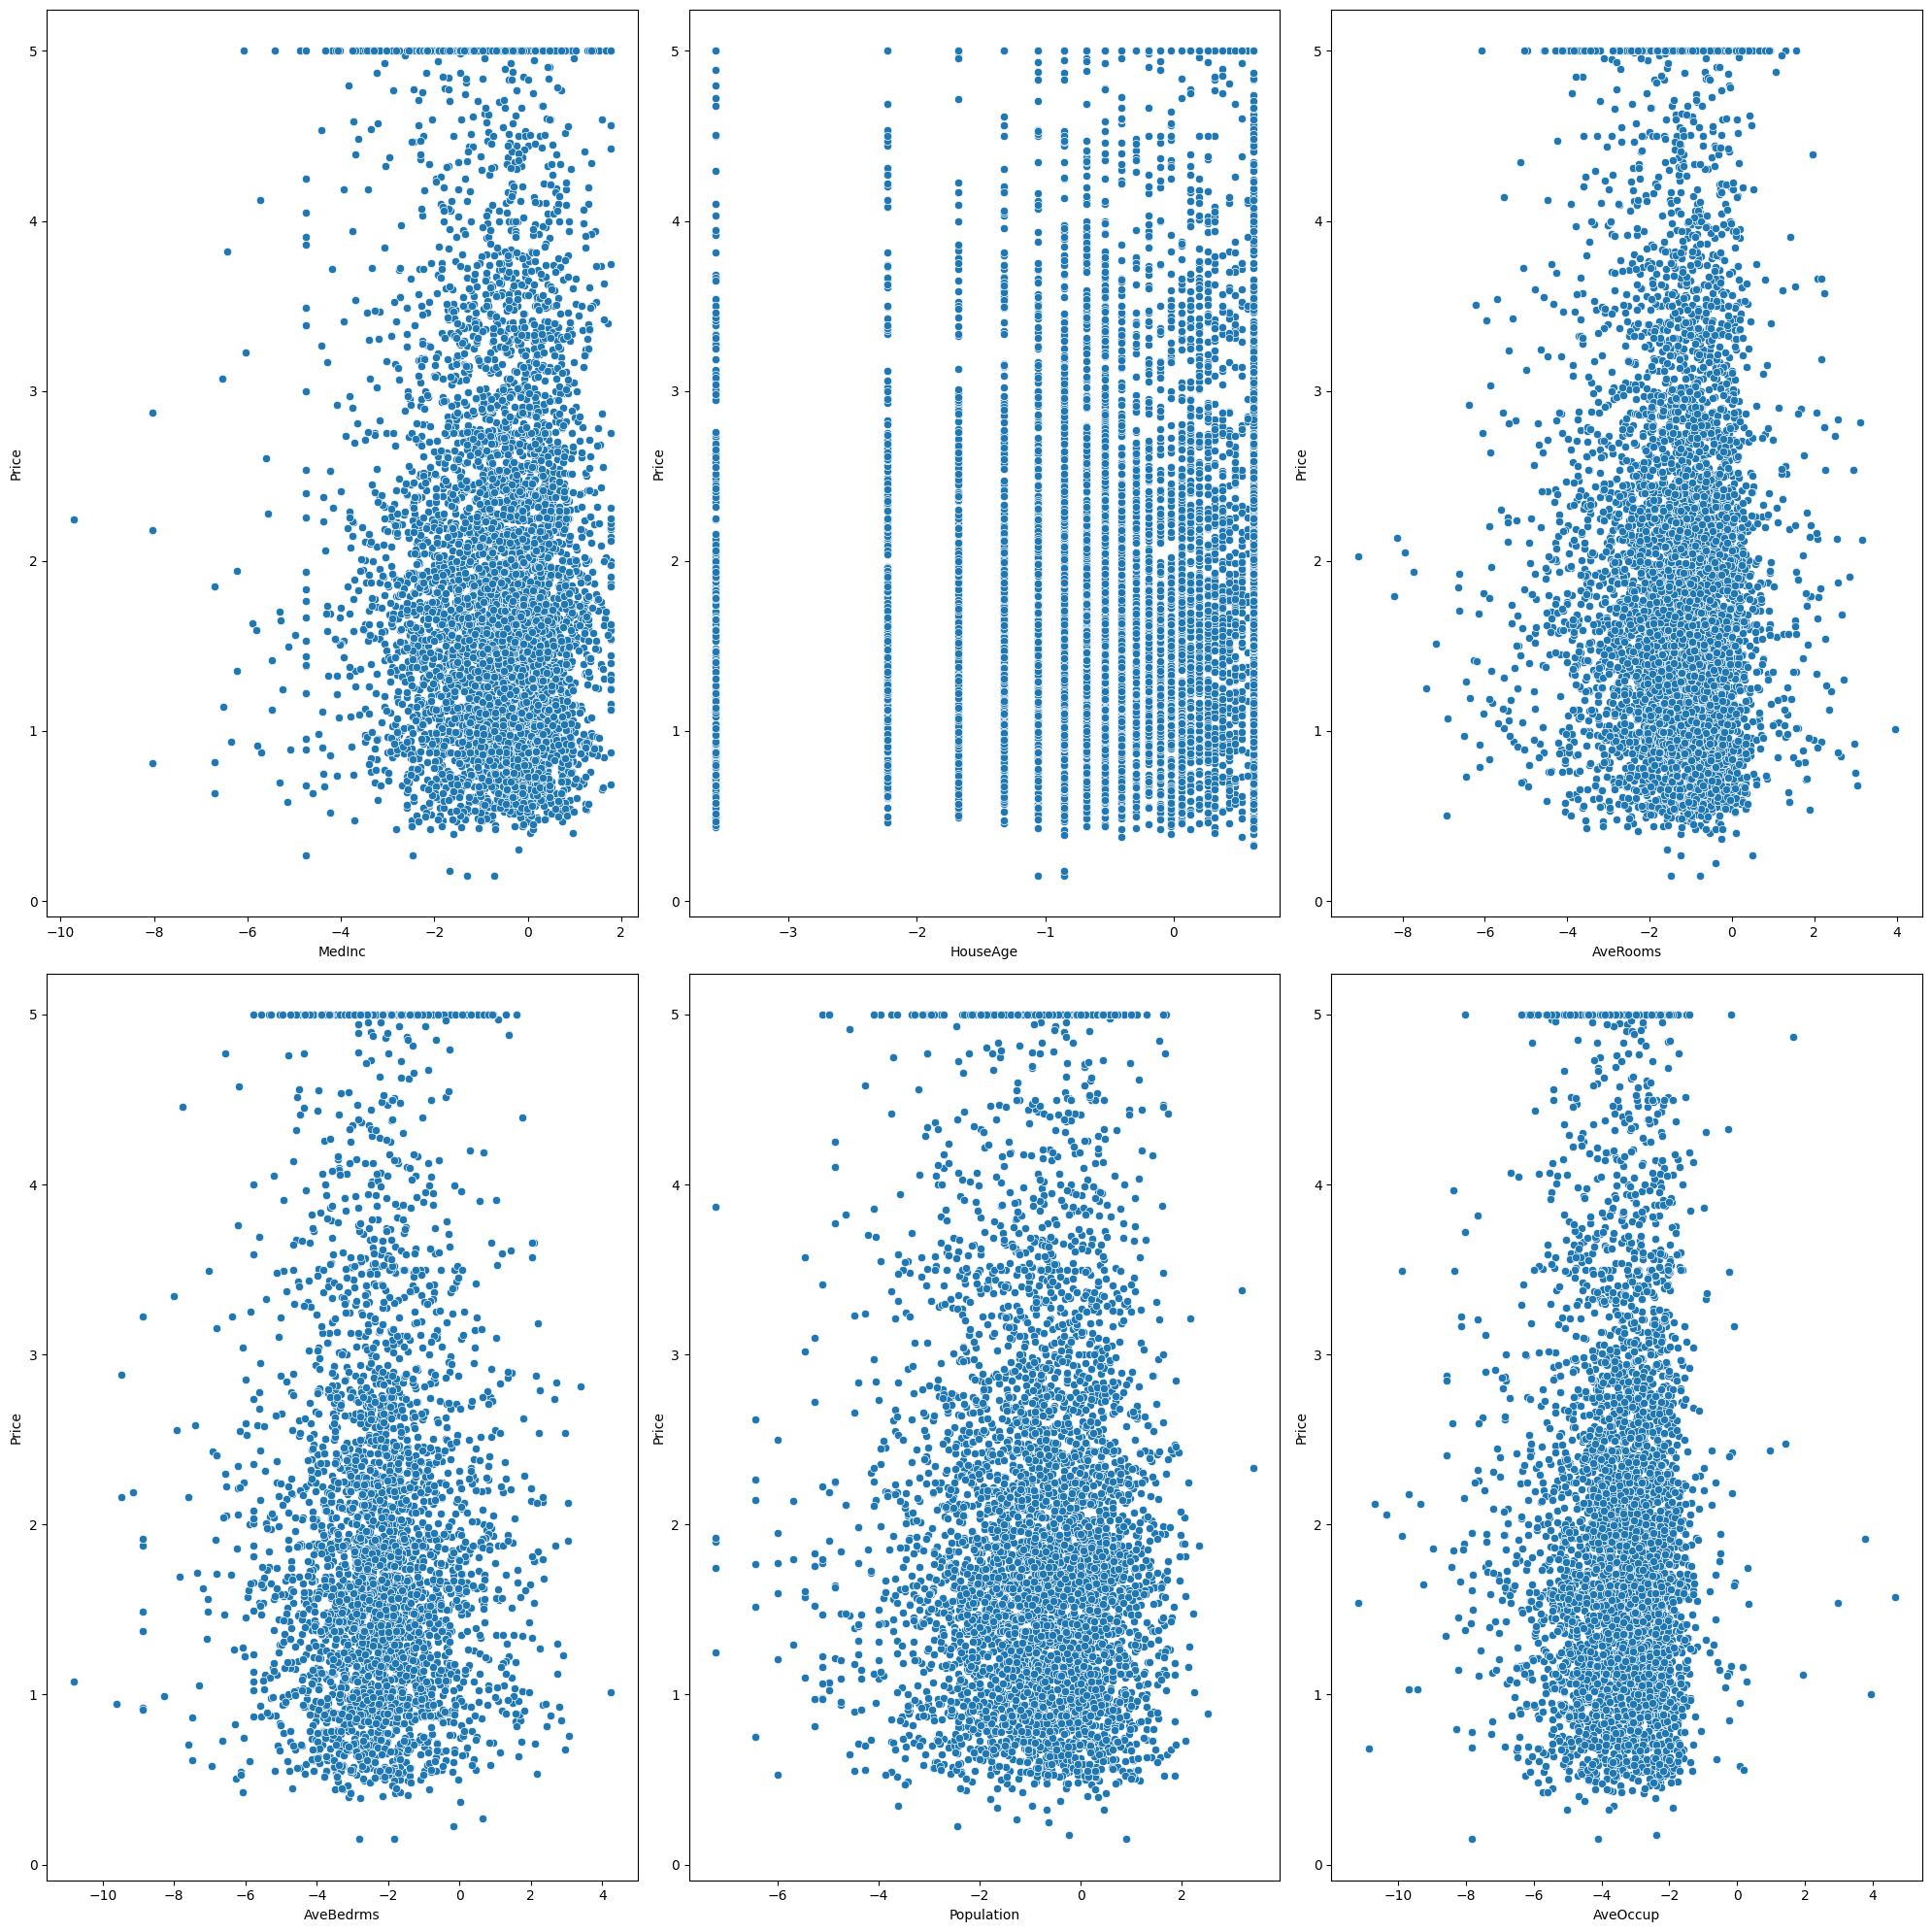

In [17]:
fig=plt.figure(figsize=(20,20))
fig,axes=plt.subplots(2,3,figsize=(20,20))
axes=axes.flatten()
newcol=xtra.columns[:-2]
for i in range(len(newcol)):
    
    sb.scatterplot(y=ytra,x=np.log(newdata[newcol[i]]),ax=axes[i])
plt.tight_layout()

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #3498db; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Target Variable Distribution</p>
</div>


<Axes: xlabel='Price', ylabel='Count'>

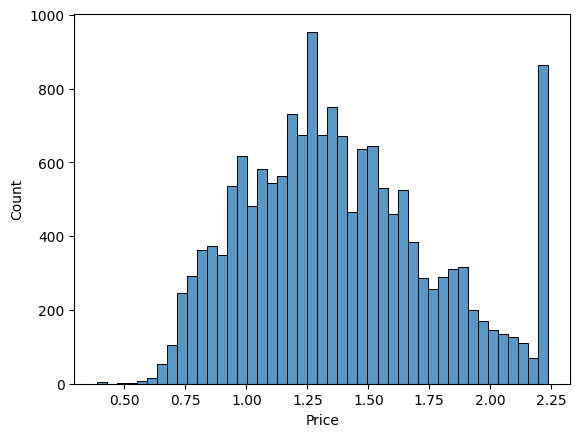

In [18]:
sb.histplot(np.sqrt(ytra))

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #3498db; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Outlier Removal</p>
</div>

In [19]:
indices=ytra[np.sqrt(ytra)>2.2].index

In [20]:
xtra=xtra.drop(indices)
ytra=ytra.drop(indices)

<Axes: xlabel='Price', ylabel='Count'>

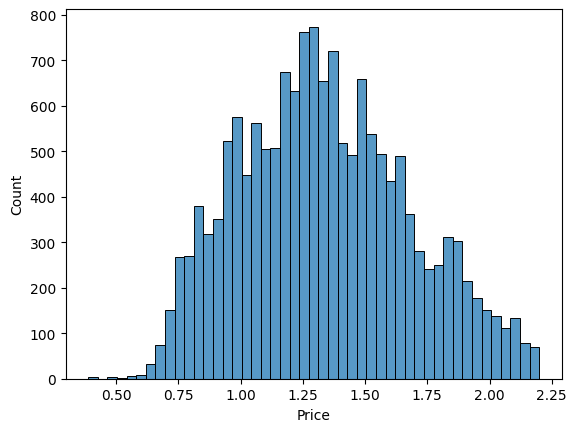

In [21]:
sb.histplot(np.sqrt(ytra))

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #3498db; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Fitting Pipeline</p>
</div>


In [22]:
pipe1=Pipeline(steps=[('col',col),('Linear',LinearRegression())])
pipe2=Pipeline(steps=[('col',col),('RF',RandomForestRegressor())])
pipe3=Pipeline(steps=[('col',col),('SVR',SVR())])
pipe4=Pipeline(steps=[('col',col),('DT',DecisionTreeRegressor())])
pipe5=Pipeline(steps=[('col',col),('KN',KNeighborsRegressor())])
pipe6=Pipeline(steps=[('col',col),('BG',BaggingRegressor())])

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #3498db; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">CROSS VAL SCORES</p>
</div>


In [23]:
me1=cross_val_score(pipe1,x,np.sqrt(y),scoring='neg_mean_squared_error').mean()
me2=cross_val_score(pipe2,x,np.sqrt(y),scoring='neg_mean_squared_error').mean()
me3=cross_val_score(pipe3,x,np.sqrt(y),scoring='neg_mean_squared_error').mean()
me4=cross_val_score(pipe4,x,np.sqrt(y),scoring='neg_mean_squared_error').mean()
me5=cross_val_score(pipe5,x,np.sqrt(y),scoring='neg_mean_squared_error').mean()
me6=cross_val_score(pipe6,x,np.sqrt(y),scoring='neg_mean_squared_error').mean()

In [24]:
r1=cross_val_score(pipe1,x,np.sqrt(y),scoring='r2').mean()
r2=cross_val_score(pipe2,x,np.sqrt(y),scoring='r2').mean()
r3=cross_val_score(pipe3,x,np.sqrt(y),scoring='r2').mean()
r4=cross_val_score(pipe4,x,np.sqrt(y),scoring='r2').mean()
r5=cross_val_score(pipe5,x,np.sqrt(y),scoring='r2').mean()
r6=cross_val_score(pipe6,x,np.sqrt(y),scoring='r2').mean()

In [25]:
estimator=['Linear Regression','Random Forest Regressor','SVR','Decision Tree Regressor','KNeighbors Regressor','Bagging Regressor']
mse=np.array([me1,me2,me3,me4,me5,me6])*-1
r2=[r1,r2,r3,r4,r5,r6]

In [26]:
pd.DataFrame(index=estimator,data=dict(Mean_Squared_Error=mse,R2Score=r2))

,Mean_Squared_Error,R2Score
Linear Regression,0.060944,0.559772
Random Forest Regressor,0.044645,0.680477
SVR,0.064924,0.529672
Decision Tree Regressor,0.091623,0.330676
KNeighbors Regressor,0.068506,0.510919
Bagging Regressor,0.051737,0.634855


<div style="border-radius: 10px; border: rgb(229, 124, 35) solid; padding: 15px; background-color: rgb(255, 250, 240); font-size: 100%; text-align: left; box-shadow: 0 0 15px rgba(229, 124, 35, 0.7);">
    <ul style="margin: 0; padding-left: 20px; list-style-type: square;">
        <li><strong>ALL MODELS ARE PERFORMING WELL</strong></li>
        <li><strong>BUT PRECISELY RANDOMFOREST,Linear Regression,BAGGING REGRESSOR PERFORMS TOO GOOD</strong></li>
    </ul>
</div>


<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #3498db; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Trying Models </p>
</div>


In [27]:
pipe1.fit(xtra,ytra)

Pipeline(steps=[('col',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss', StandardScaler(),
                                                  Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup'],
      dtype='object'))])),
                ('Linear', LinearRegression())])

In [28]:
pipe1.score(xtest,ytest)

0.6155813777192035

In [29]:
pipe2.fit(xtra,ytra)

Pipeline(steps=[('col',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss', StandardScaler(),
                                                  Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup'],
      dtype='object'))])),
                ('RF', RandomForestRegressor())])

In [30]:
pipe2.score(xtest,ytest)

0.7946671002490687

In [31]:
pipe6.fit(xtra,ytra)

Pipeline(steps=[('col',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss', StandardScaler(),
                                                  Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup'],
      dtype='object'))])),
                ('BG', BaggingRegressor())])

In [32]:
pipe6.score(xtest,ytest)

0.7814591310116432

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #3498db; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Trying Principal Component Analysis</p>
</div>


In [33]:
from sklearn.decomposition import PCA

xtra, xtest, ytra, ytest = train_test_split(x, y, test_size=0.2, random_state=90)

def standardize(df):
    ss = StandardScaler()
    scaler = ('ss', ss, newcol)
    col = ColumnTransformer([scaler], remainder='passthrough')
    newdata = pd.DataFrame(col.fit_transform(df), columns=df.columns)
    return newdata

def apply_pca(pca, df):
    standardized_data = standardize(df)
    transformed_features = pca.fit_transform(standardized_data.iloc[:, :-2])
    transformed_features_df = pd.DataFrame(transformed_features)
    transformed_features_df.columns = transformed_features_df.columns.astype(str)
    return pd.concat([transformed_features_df, standardized_data.iloc[:, -2:]], axis=1)

pca_values = []
for i in range(1, 7):
    pca = PCA(i)
    xtra_transformed = apply_pca(pca, xtra)
    xtest_transformed = apply_pca(pca, xtest)

    model1 = RandomForestRegressor()
    model1.fit(xtra_transformed, ytra)
    m1 = model1.score(xtest_transformed, ytest)

    model2 = LinearRegression()
    model2.fit(xtra_transformed, ytra)
    m2 = model2.score(xtest_transformed, ytest)

    model3 = BaggingRegressor()
    model3.fit(xtra_transformed, ytra)
    m3 = model3.score(xtest_transformed, ytest)

    pca_values.append((i, m1, m2, m3))


In [34]:
data=pd.DataFrame(pca_values)
data.set_index(0,inplace=True)
data.columns=['Random Forest','Linear Regression','Bagging Regressor']
data.index.name='PCA AXIS COUNT'

In [35]:
data

,Random Forest,Linear Regression,Bagging Regressor
PCA AXIS COUNT,,,
1,0.824318,0.312662,0.809696
2,0.828279,0.310857,0.813464
3,0.801168,0.544017,0.777054
4,0.745478,0.526805,0.692262
5,0.596906,0.446412,0.547438
6,0.539056,0.440918,0.522923


<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #3498db; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">"PCA Performs well when the axis are small in number."</p>
</div>


<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Thank u for visiting</p>
